In [26]:
import pandas as pd
from sklearn import preprocessing, preprocessing
import matplotlib.dates as mdates

In [34]:
df = pd.read_pickle('tsla.pkl')

In [35]:
df

Adj Close                    Close                     High  \
                  TSLA        ^IXIC        TSLA        ^IXIC        TSLA   
Date                                                                       
2016-01-04  223.410004  4903.089844  223.410004  4903.089844  231.380005   
2016-01-05  223.429993  4891.430176  223.429993  4891.430176  226.889999   
2016-01-06  219.039993  4835.759766  219.039993  4835.759766  220.050003   
2016-01-07  215.649994  4689.430176  215.649994  4689.430176  218.440002   
2016-01-08  211.000000  4643.629883  211.000000  4643.629883  220.440002   
...                ...          ...         ...          ...         ...   
2020-04-27  798.750000  8730.160156  798.750000  8730.160156  799.489990   
2020-04-28  769.119995  8607.730469  769.119995  8607.730469  805.000000   
2020-04-29  800.510010  8914.709961  800.510010  8914.709961  803.200012   
2020-04-30  781.880005  8889.549805  781.880005  8889.549805  869.820007   
2020-05-01  701.320007  8604.950195  701.320007  8604.950195  772.770020   

                                Low                     Open               \
                  ^IXIC        TSLA        ^IXIC        TSLA        ^IXIC   
Date                                                                        
2016-01-04  4903.089844  219.000000  4846.979980  230.720001  4897.649902   
2016-01-05  4926.729980  220.000000  4872.740234  226.360001  4917.839844   
2016-01-06  4866.040039  215.979996  4804.689941  220.000000  4813.759766   
2016-01-07  4788.020020  213.669998  4688.169922  214.190002  4736.399902   
2016-01-08  4742.569824  210.770004  4637.850098  217.860001  4722.020020   
...                 ...         ...          ...         ...          ...   
2020-04-27  8754.570312  735.000000  8697.370117  737.609985  8717.980469   
2020-04-28  8830.570312  756.690002  8600.700195  795.640015  8825.690430   
2020-04-29  8957.269531  783.159973  8765.009766  790.169983  8802.700195   
2020-04-30  8926.110352  763.500000  8825.830078  855.190002  8911.019531   
2020-05-01  8754.459961  683.039978  8566.839844  755.000000  8681.290039   

              Volume              
                TSLA       ^IXIC  
Date                              
2016-01-04   6827100  2218420000  
2016-01-05   3186800  1927380000  
2016-01-06   3779100  2168620000  
2016-01-07   3554300  2552590000  
2016-01-08   3628100  2288750000  
...              ...         ...  
2020-04-27  20681400  3678460000  
2020-04-28  15222000  3707540000  
2020-04-29  16216000  4378540000  
2020-04-30  28471900  4316380000  
2020-05-01  32479600  3722520000  

[1090 rows x 12 columns]

In [36]:
def norm(df):
    return (df - df.mean()) / (df.max() - df.min())

In [37]:
df.describe()

Adj Close                     Close                      High  \
              TSLA        ^IXIC         TSLA        ^IXIC         TSLA   
count  1090.000000  1090.000000  1090.000000  1090.000000  1090.000000   
mean    305.981275  6801.288624   305.981275  6801.288624   312.006716   
std     116.208274  1295.309707   116.208274  1295.309707   121.163123   
min     143.669998  4266.839844   143.669998  4266.839844   154.970001   
25%     229.150002  5657.449829   229.150002  5657.449829   232.062500   
50%     294.819992  7011.159912   294.819992  7011.159912   300.699997   
75%     338.130005  7836.164917   338.130005  7836.164917   344.652496   
max     917.419983  9817.179688   917.419983  9817.179688   968.989990   

                            Low                      Open               \
             ^IXIC         TSLA        ^IXIC         TSLA        ^IXIC   
count  1090.000000  1090.000000  1090.000000  1090.000000  1090.000000   
mean   6838.679980   299.667826  6757.394525   305.922982  6799.493392   
std    1305.173085   111.534650  1284.727159   116.450594  1295.086430   
min    4293.220215   141.050003  4209.759766   142.320007  4218.810059   
25%    5666.992432   225.360001  5644.819946   229.187496  5655.119873   
50%    7084.390137   289.040009  6945.114990   295.584991  7013.149902   
75%    7870.982300   332.962502  7794.380127   338.942490  7829.442505   
max    9838.370117   901.020020  9777.099609   923.500000  9799.200195   

             Volume                
               TSLA         ^IXIC  
count  1.090000e+03  1.090000e+03  
mean   8.199406e+06  2.145839e+09  
std    5.969445e+06  5.778540e+08  
min    1.659500e+06  1.494100e+08  
25%    4.586325e+06  1.819475e+09  
50%    6.366000e+06  2.026455e+09  
75%    9.419825e+06  2.290285e+09  
max    6.093880e+07  5.301170e+09

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2016-01-04 to 2020-05-01
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, TSLA)   1090 non-null   float64
 1   (Adj Close, ^IXIC)  1090 non-null   float64
 2   (Close, TSLA)       1090 non-null   float64
 3   (Close, ^IXIC)      1090 non-null   float64
 4   (High, TSLA)        1090 non-null   float64
 5   (High, ^IXIC)       1090 non-null   float64
 6   (Low, TSLA)         1090 non-null   float64
 7   (Low, ^IXIC)        1090 non-null   float64
 8   (Open, TSLA)        1090 non-null   float64
 9   (Open, ^IXIC)       1090 non-null   float64
 10  (Volume, TSLA)      1090 non-null   int64  
 11  (Volume, ^IXIC)     1090 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 110.7 KB


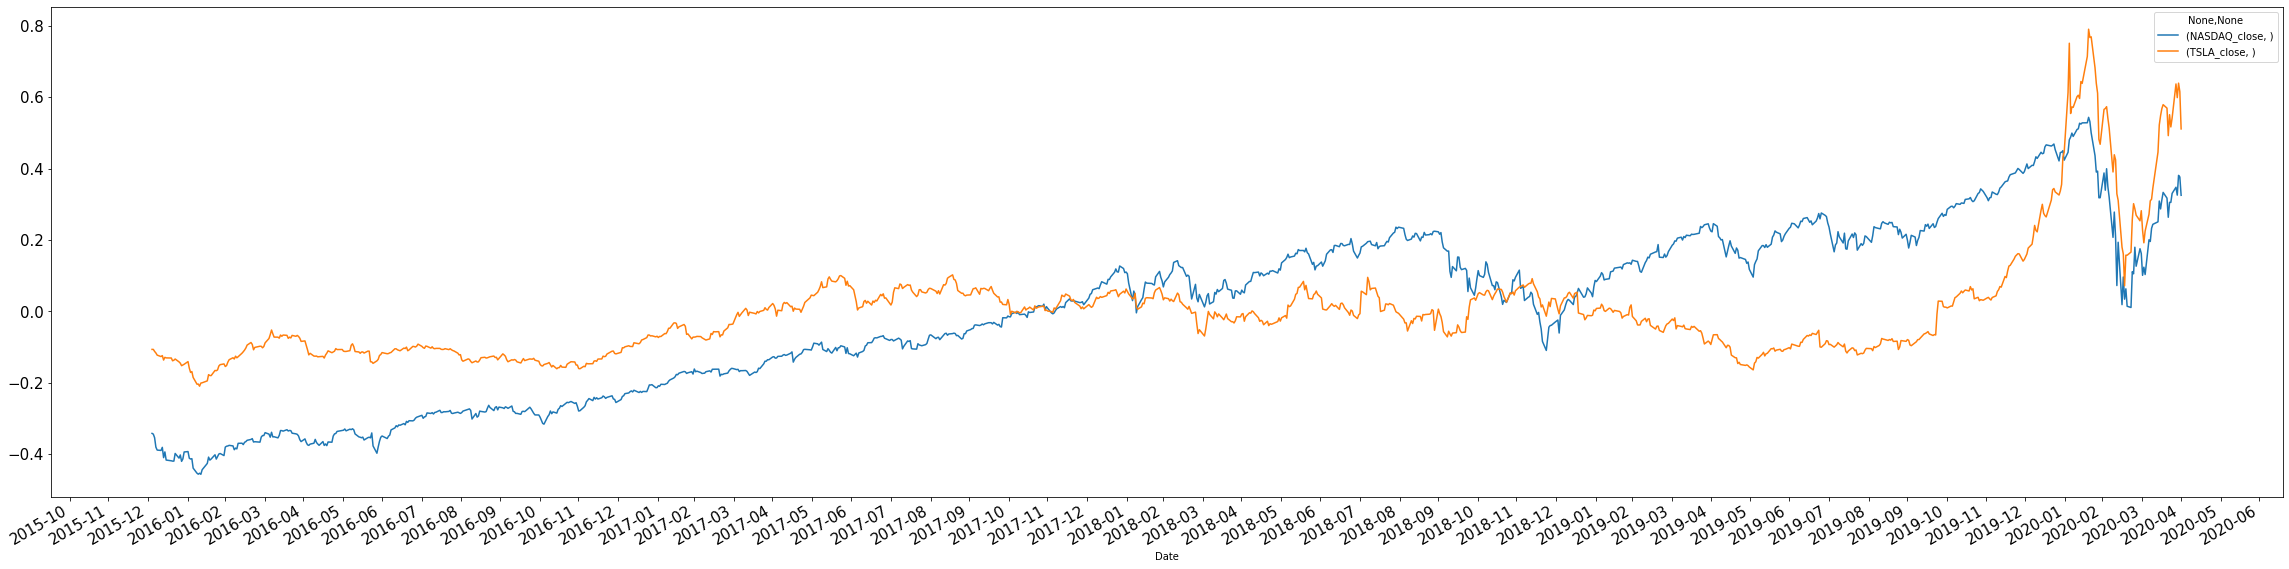

In [41]:
df['TSLA_close'] = norm(df['Adj Close']['TSLA'])
df['NASDAQ_close'] = norm(df['Adj Close']['^IXIC'])
df[['NASDAQ_close', 'TSLA_close']].plot(figsize=(40,10), fontsize=15).xaxis.set_major_locator(mdates.MonthLocator())

In [40]:
df.drop(['Close', 'High', 'Low', 'Open'], axis=1, inplace=True)
df.index = df.index.tz_localize('EST')

In [9]:
df['TSLA_diff'] = df['Adj Close']['TSLA'].diff()
df['NASDAQ_diff'] = df['Adj Close']['^IXIC'].diff()

In [10]:
df

Adj Close                 Volume              \
                                 TSLA        ^IXIC      TSLA       ^IXIC   
Date                                                                       
2016-01-04 00:00:00-05:00  223.410004  4903.089844   6827100  2218420000   
2016-01-05 00:00:00-05:00  223.429993  4891.430176   3186800  1927380000   
2016-01-06 00:00:00-05:00  219.039993  4835.759766   3779100  2168620000   
2016-01-07 00:00:00-05:00  215.649994  4689.430176   3554300  2552590000   
2016-01-08 00:00:00-05:00  211.000000  4643.629883   3628100  2288750000   
...                               ...          ...       ...         ...   
2020-04-27 00:00:00-05:00  798.750000  8730.160156  20681400  3678460000   
2020-04-28 00:00:00-05:00  769.119995  8607.730469  15222000  3707540000   
2020-04-29 00:00:00-05:00  800.510010  8914.709961  16216000  4378540000   
2020-04-30 00:00:00-05:00  781.880005  8889.549805  28471900  4316380000   
2020-05-01 00:00:00-05:00  701.320007  8604.950195  32479600  3722520000   

                          TSLA_close NASDAQ_close  TSLA_diff NASDAQ_diff  
                                                                          
Date                                                                      
2016-01-04 00:00:00-05:00  -0.106716    -0.341997        NaN         NaN  
2016-01-05 00:00:00-05:00  -0.106690    -0.344098   0.019989  -11.659668  
2016-01-06 00:00:00-05:00  -0.112364    -0.354128  -4.389999  -55.670410  
2016-01-07 00:00:00-05:00  -0.116745    -0.380492  -3.389999 -146.329590  
2016-01-08 00:00:00-05:00  -0.122754    -0.388744  -4.649994  -45.800293  
...                              ...          ...        ...         ...  
2020-04-27 00:00:00-05:00   0.636858     0.347523  73.599976   95.640625  
2020-04-28 00:00:00-05:00   0.598564     0.325465 -29.630005 -122.429688  
2020-04-29 00:00:00-05:00   0.639132     0.380773  31.390015  306.979492  
2020-04-30 00:00:00-05:00   0.615055     0.376240 -18.630005  -25.160156  
2020-05-01 00:00:00-05:00   0.510939     0.324964 -80.559998 -284.599609  

[1090 rows x 8 columns]

In [11]:
df

Adj Close                 Volume              \
                                 TSLA        ^IXIC      TSLA       ^IXIC   
Date                                                                       
2016-01-04 00:00:00-05:00  223.410004  4903.089844   6827100  2218420000   
2016-01-05 00:00:00-05:00  223.429993  4891.430176   3186800  1927380000   
2016-01-06 00:00:00-05:00  219.039993  4835.759766   3779100  2168620000   
2016-01-07 00:00:00-05:00  215.649994  4689.430176   3554300  2552590000   
2016-01-08 00:00:00-05:00  211.000000  4643.629883   3628100  2288750000   
...                               ...          ...       ...         ...   
2020-04-27 00:00:00-05:00  798.750000  8730.160156  20681400  3678460000   
2020-04-28 00:00:00-05:00  769.119995  8607.730469  15222000  3707540000   
2020-04-29 00:00:00-05:00  800.510010  8914.709961  16216000  4378540000   
2020-04-30 00:00:00-05:00  781.880005  8889.549805  28471900  4316380000   
2020-05-01 00:00:00-05:00  701.320007  8604.950195  32479600  3722520000   

                          TSLA_close NASDAQ_close  TSLA_diff NASDAQ_diff  
                                                                          
Date                                                                      
2016-01-04 00:00:00-05:00  -0.106716    -0.341997        NaN         NaN  
2016-01-05 00:00:00-05:00  -0.106690    -0.344098   0.019989  -11.659668  
2016-01-06 00:00:00-05:00  -0.112364    -0.354128  -4.389999  -55.670410  
2016-01-07 00:00:00-05:00  -0.116745    -0.380492  -3.389999 -146.329590  
2016-01-08 00:00:00-05:00  -0.122754    -0.388744  -4.649994  -45.800293  
...                              ...          ...        ...         ...  
2020-04-27 00:00:00-05:00   0.636858     0.347523  73.599976   95.640625  
2020-04-28 00:00:00-05:00   0.598564     0.325465 -29.630005 -122.429688  
2020-04-29 00:00:00-05:00   0.639132     0.380773  31.390015  306.979492  
2020-04-30 00:00:00-05:00   0.615055     0.376240 -18.630005  -25.160156  
2020-05-01 00:00:00-05:00   0.510939     0.324964 -80.559998 -284.599609  

[1090 rows x 8 columns]

In [12]:
tsla_diff = df['TSLA_diff']
nasdaq_diff = df['NASDAQ_diff']

df['TSLA_diff'] = norm(tsla_diff)
df['NASDAQ_diff'] = norm(nasdaq_diff)
df['net_diff'] =  df['TSLA_diff'] - df['NASDAQ_diff'] 
# pos doing doing better, neg doing worst than nasdaq


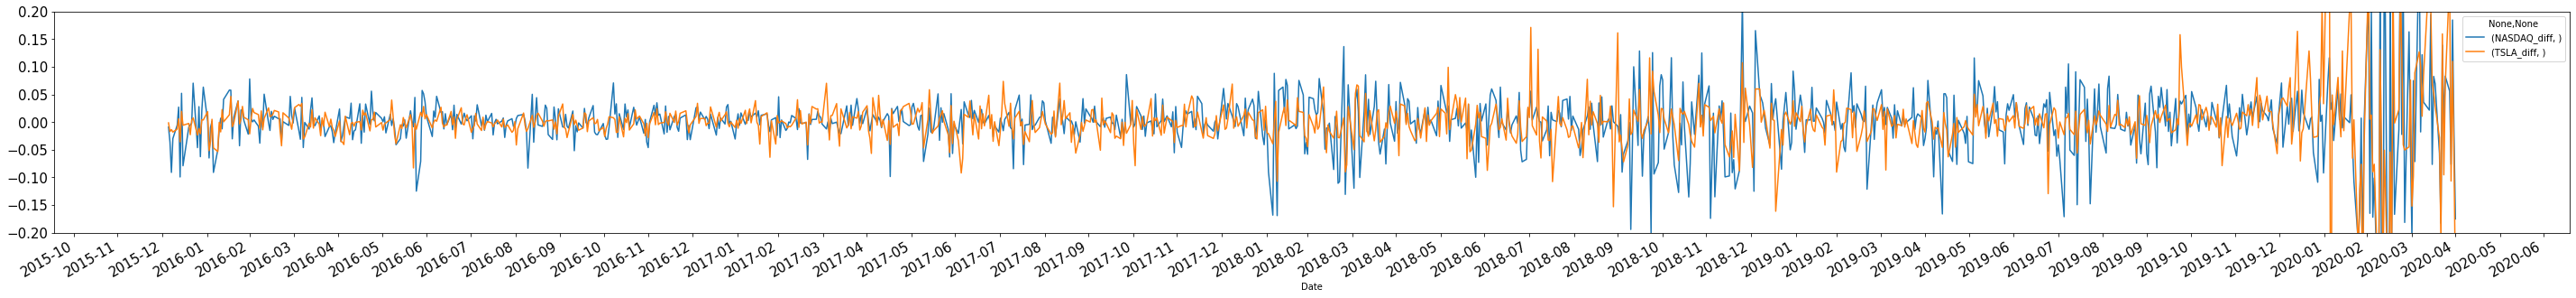

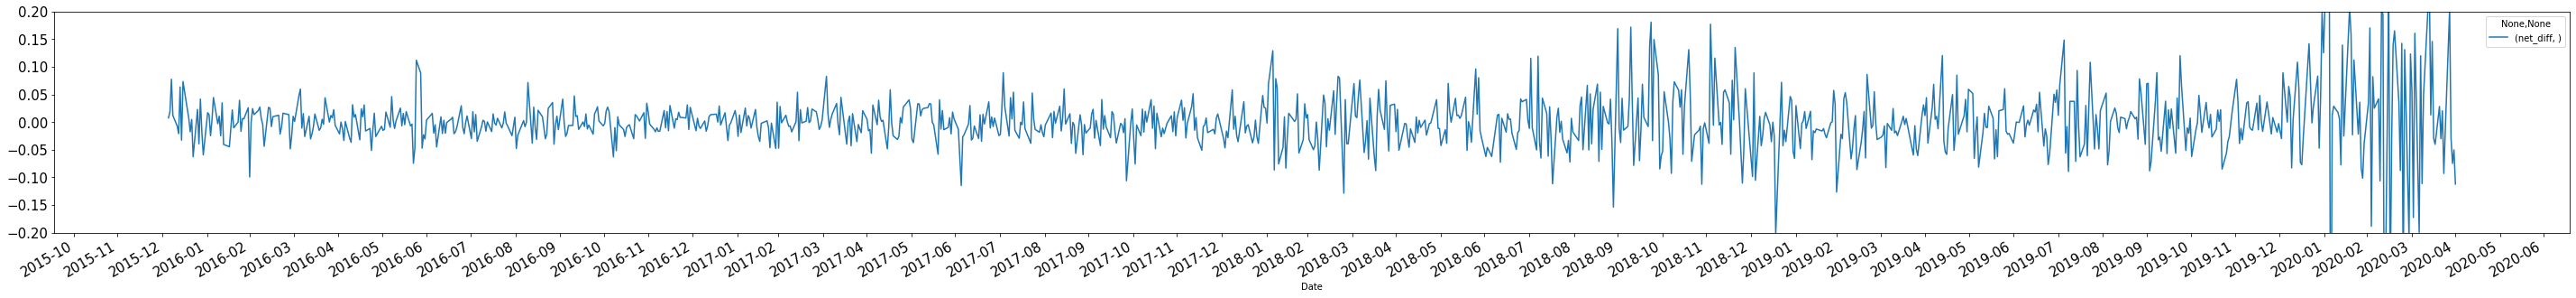

In [32]:
df[['NASDAQ_diff', 'TSLA_diff']].plot(figsize=(50,5), fontsize=15, ylim=(-0.2, 0.2), x_compat=True).xaxis.set_major_locator(mdates.MonthLocator())
df[['net_diff']].plot(figsize=(50,5), fontsize=15, ylim=(-0.2, 0.2)).xaxis.set_major_locator(mdates.MonthLocator())

In [14]:
tsla_vol = df['Volume']['TSLA']
nasdaq_vol = df['Volume']['^IXIC']
df['TSLA_vol'] = norm(tsla_vol)
df['NASDAQ_vol'] = norm(nasdaq_vol)
df['net_vol'] =  df['TSLA_vol'] - df['NASDAQ_vol'] 

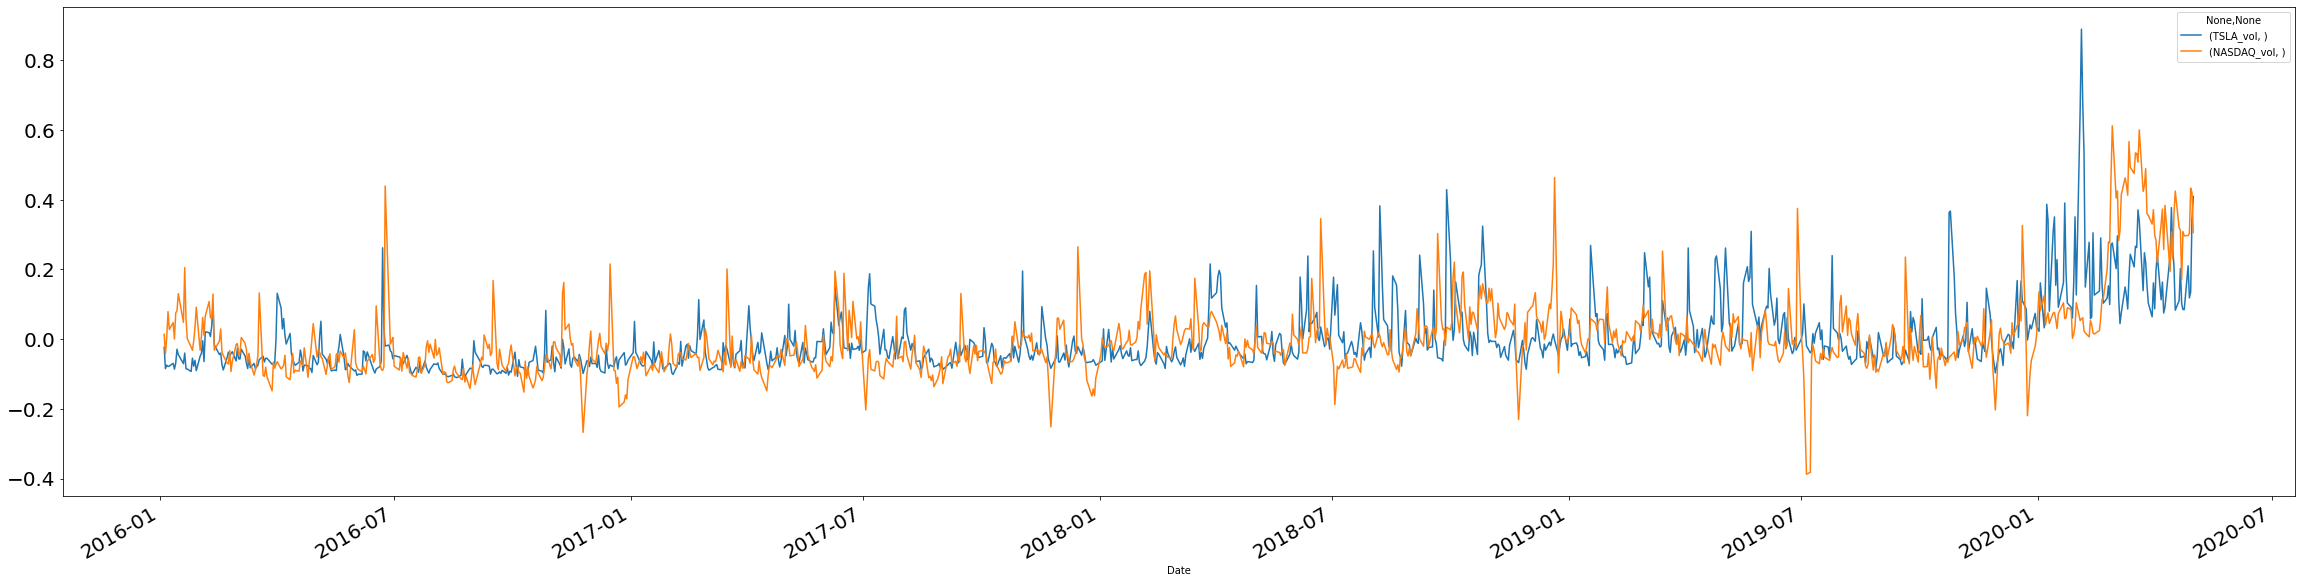

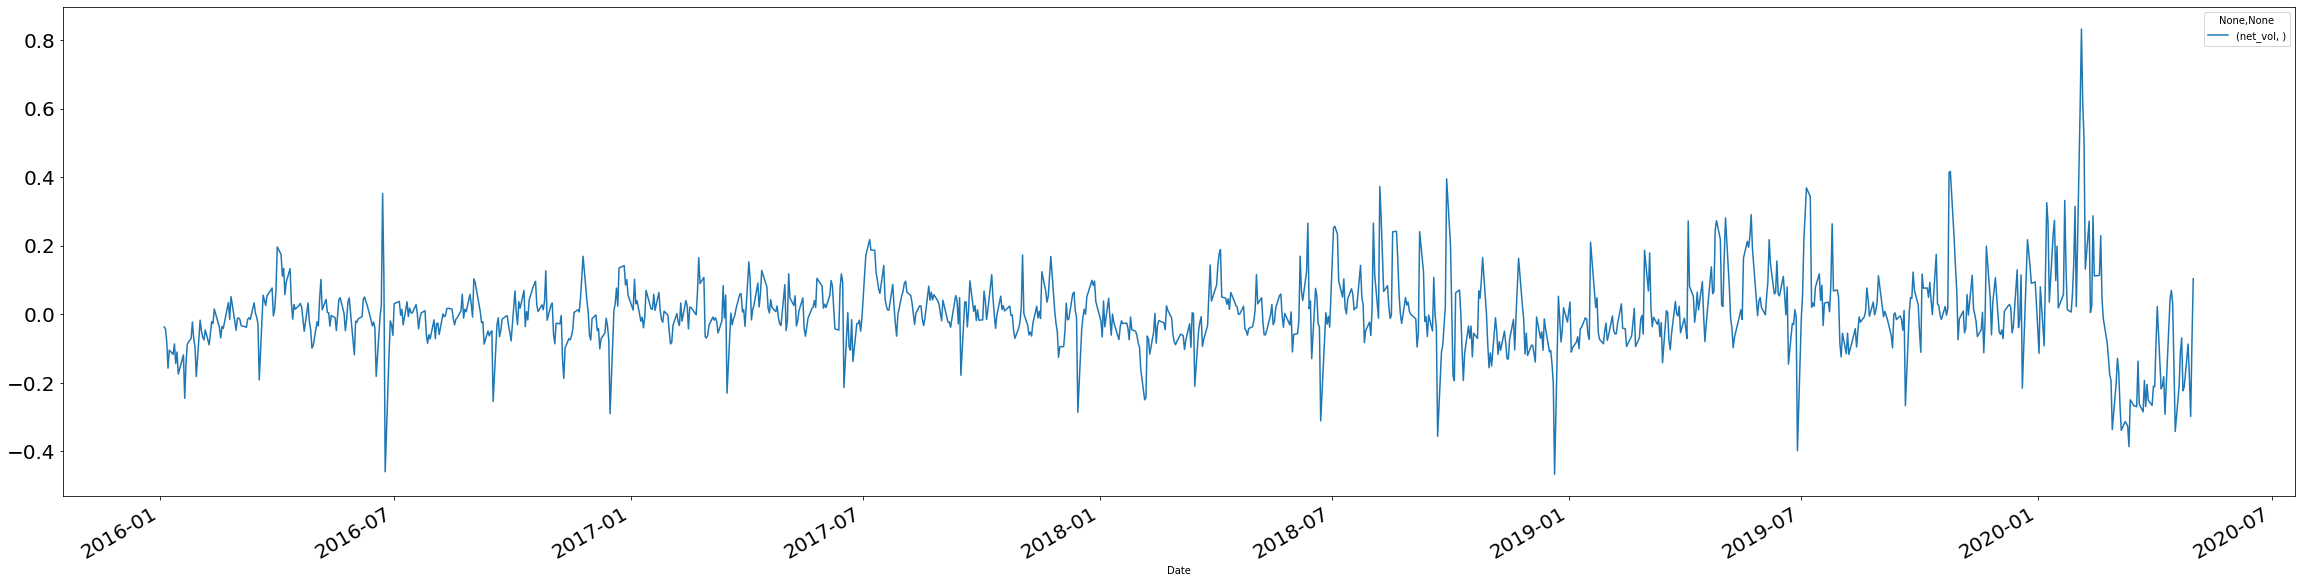

In [15]:
df[['TSLA_vol', 'NASDAQ_vol']].plot(figsize=(40,10), fontsize=20)
df[['net_vol']].plot(figsize=(40,10), fontsize=20)

In [16]:
df.drop(['Adj Close', 'Volume'], inplace=True, axis=1)
df.drop(df[df['TSLA_diff'].isnull()].index)

,TSLA_close,NASDAQ_close,TSLA_diff,NASDAQ_diff,net_diff,TSLA_vol,NASDAQ_vol,net_vol
,,,,,,,,
Date,,,,,,,,
2016-01-05 00:00:00-05:00,-0.106690,-0.344098,-0.001486,-0.009163,0.007677,-0.084559,-0.042405,-0.042154
2016-01-06 00:00:00-05:00,-0.112364,-0.354128,-0.017136,-0.035944,0.018808,-0.074567,0.004422,-0.078989
2016-01-07 00:00:00-05:00,-0.116745,-0.380492,-0.013588,-0.091111,0.077523,-0.078360,0.078954,-0.157313
2016-01-08 00:00:00-05:00,-0.122754,-0.388744,-0.018059,-0.029938,0.011879,-0.077115,0.027740,-0.104855
2016-01-11 00:00:00-05:00,-0.126826,-0.389760,-0.012736,-0.005500,-0.007236,-0.069299,0.047609,-0.116908
...,...,...,...,...,...,...,...,...
2020-04-27 00:00:00-05:00,0.636858,0.347523,0.259630,0.056129,0.203501,0.210562,0.297495,-0.086932
2020-04-28 00:00:00-05:00,0.598564,0.325465,-0.106707,-0.076568,-0.030139,0.118466,0.303139,-0.184673
